As someone whose primarily education was statistics and research, in transition to data science and development, my main insight was the limitation of the computational power of the machine and the need for optimisation. Working in a field where very serious state policy were made base on the research on several thousands of carefully sampled respondents, the questions of computational limitation and time complexity was never raised. Preparing myself for the job interviews, one of the first exercises I have done was a simple plotting of time complexity in the most simple task. I just wanted to see time of the execution with raising iterations when we have exponential versus linear and logarithmic complexity. I did the most simple execution task. With the 100k of iteration with the most simple exponenctial function, waiting time dramatically extended. I believe that noise blue line captures some kind of the oscilation in the cpu stress. 

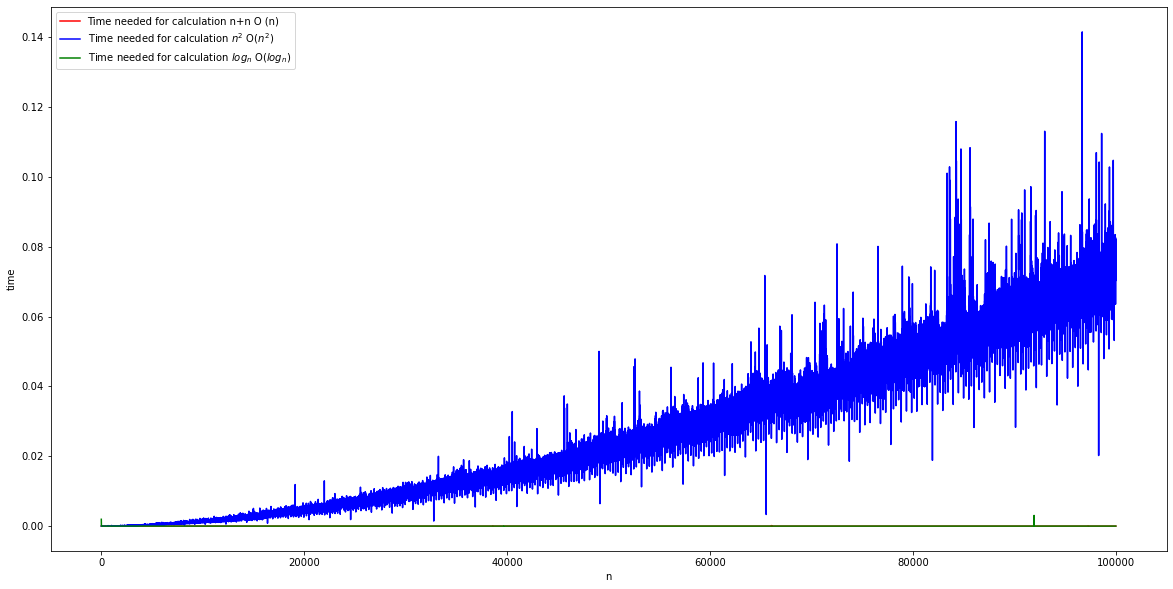

In [13]:
import time
import math
from matplotlib import pylab as plt
import seaborn as sns

linear_complexity=[]
exponential_complexity=[]
logarithmic_complexity=[]

for n in range(1,100000):
    start=time.time()
    zbir=n+n
    end=time.time()
    linear_complexity.append(end-start)
for n in range(1,100000):
    start=time.time()
    stepen=n**n
    end=time.time()
    exponential_complexity.append(end-start)
for n in range(1,100000):
    start=time.time()
    logaritam=math.log2(n)
    end=time.time()
    logarithmic_complexity.append(end-start)

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.plot(linear_complexity, label='Time needed for calculation n+n O (n)', color='red')
ax.plot(exponential_complexity, label='Time needed for calculation $n^2$ O($n^2$)', color='blue')
ax.plot(logarithmic_complexity, label='Time needed for calculation $log_{n}$ O($log_{n}$)', color='green')
plt.xlabel('n')
plt.ylabel('time')
ax.legend()
plt.show()

Another big issue that was raised was the mathematical formalism and theory behind NP-complete problems and NP-hard problems. The way of verification of some problems is very easy but finding the solution for them is in some cases very computational demanding and almost impossible in practise. For example, you can easily check whether the computer found your neighbour in some search by address and the floor of leaving, but actual finding your neighboor in the population of habitants could be very demanding and can depend on the size of population of habitants if you just take a data of the door to door distance. But could we predict the function of time that depends of the number of habitants? 

Let's try define the concepts (if somebody reads this, correct me if I am wrong somewhere). The class of questions for which an answer can be verified in polynomial time is NP, which stands for "nondeterministic polynomial time". An answer to the P versus NP question would determine whether problems that can be verified in polynomial time can also be solved in polynomial time. Polynomial time simply means that times could be exponentialy raised in corespodence with the task complexity demand but that we can predict this time, as much long as it is. "NP-hard" does not stand for "non-polynomial" when in fact it stands for "non-deterministic polynomial acceptable problems", which means that we could not predict how much the time need will raised according to the changes in the input task.

If it turns out that P ≠ NP, which is widely believed, it would mean that there are problems in NP that are harder to compute than to verify: they could not be solved in polynomial time, but the answer could be verified in polynomial time. Here we will illustrate one famous NP-hard problem, Traveling Salesman Problem. It is said that this is NP-complete and NP-hard problem. 

A problem is NP-complete (definition from Wikipedia) when:

a) it is a problem for which the correctness of each solution can be verified quickly (namely, in polynomial time) and a brute-force search algorithm can find a solution by trying all possible solutions.

b)the problem can be used to simulate every other problem for which we can verify quickly that a solution is correct. In this sense, NP-complete problems are the hardest of the problems to which solutions can be verified quickly. If we could find solutions of some NP-complete problem quickly, we could quickly find the solutions of every other problem to which a given solution can be easily verified.

A problem(1) is NP-hard when every other similar problem (x) in NP can be reduced in polynomial time to the our previous proiblem; that is, assuming a solution for problem(1) takes 1 unit time, problem(1)'s solution can be used to solve problem x in polynomial time. 

Ok, let's try to be a little bit more pragmatical and related to more concrete experience. 

Imagine you are a salesman and you should visit the x number of cities. You want to make the shortest possible tour. How would you do this? I beleive that you would rely on the computational powers of computer and that you calculate all possible routes and than choose the shortest one (brute force approach).

With this short example we want to illustrate need for optimisation and heruistics. Brute force approach in Traveller Salesman problem results in huge computational time, while simple greedy algorithm gives unbelievable improvement. This is NP-hard problem is very easily understand. In the next code which is basically the code from the very good book of Felix Bittmann (Python for Scientifinc and Engeneering Applications) which I recommend, we will see how simple optimisation strategy could gives us not 100% accurate but adequate solution in reasonable time. 

In [18]:
import random
from itertools import permutations
alltours = permutations

First the most simplest function calculates absolute distance between two cities.

In [19]:
def distance_points(first, second):
    return abs(first-second)

The other function calculates the tour distance accross all cities, using the previous function.

In [20]:
def distance_tour(aTour):
    return sum(distance_points(aTour[i-1], aTour[i])
              for i in range(len(aTour)))

This simple function generates the desired number of cities by random generation of geografic width and height. 

In [21]:
aCity=complex
def generate_cities(number_of_cities):
    seed=111;width=500;height=300 
    random.seed((number_of_cities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1, height)) for c in range(number_of_cities))

In [22]:
created_cities = generate_cities(10)
created_cities

frozenset({(12+295j),
           (155+96j),
           (175+62j),
           (187+262j),
           (23+142j),
           (29+215j),
           (299+92j),
           (442+24j),
           (444+157j),
           (467+141j)})

In [23]:
created_cities_a_lot =generate_cities(2000)

The next functions finds a minimum of all tours.

In [29]:
def shortest_tour(tours):
    return min(tours, key=distance_tour)

The brute force function finds the shortest tour accross all generated tours accross all cities.

In [30]:
def brute_force(gradovi):
    return shortest_tour(alltours(gradovi))
    

The next function illustrates the starting point and all cities as spots.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_tour(tour, style='bo-'):
    if len(tour)>1000:
        plt.figure(figsize=(15,10))
    start=tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD')

This function actually makes a line between two cities.

In [32]:
import matplotlib.pyplot as plt
def visualize_segment(segment, style='bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')



In [33]:
def X(city): 'X axis'; return city.real
def Y(city): 'Y axis'; return city.imag

The next function integrates all previous ones, allowing the change of the algorithm for finding the shortest route and calculating time of execution and distance length.

In [37]:
import time
from collections import Counter
def salesman(algorithm, cities):
    t0=time.process_time() 
    tour = algorithm(cities)
    t1=time.process_time() 
    assert Counter(tour)==Counter(cities)
    visualize_tour(tour)
    print('{}: {} cities = tour length {:.0f} (in {:.3f} sec)'.format(name(algorithm), len(tour), distance_tour(tour),t1-t0))

def name(algoritam): return algoritam.__name__.replace('_tsp', '')

brute_force: 10 cities = tour length 1224 (in 9.258 sec)


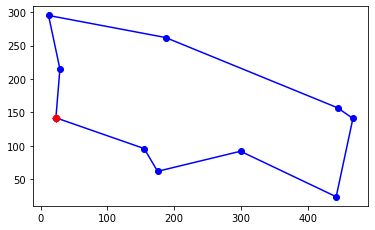

In [38]:
salesman(brute_force, created_cities)

Now we define the greedy algorithm for selection of the next city in the tour. The principle is simple: algorithm finds the next the closest city (with the helper function neares_neighboor) and visits it, making not shortest but we hope optimal tour.

In [39]:
def nearest_neighboor(A, gradovi):
    return min(gradovi, key=lambda C: distance_points(C,A))

def first(collection): 
    return next(iter(collection))

def greedy_algorithm(cities, start=None):
    C=start or first(cities)
    tour=[C]
    unvisited = set(cities-{C})
    while unvisited:
        C=nearest_neighboor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

greedy_algorithm: 10 cities = tour length 1224 (in 0.000 sec)


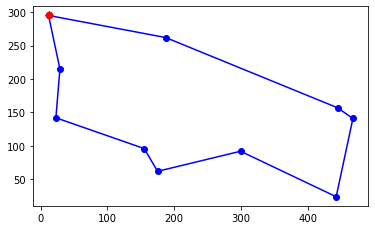

In [40]:
salesman(greedy_algorithm, created_cities)

greedy_algorithm: 20 cities = tour length 1480 (in 0.000 sec)


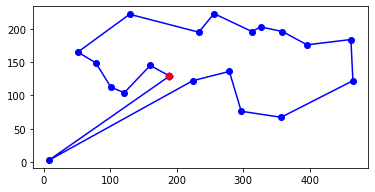

In [45]:
salesman(greedy_algorithm, generate_cities(20))

brute_force: 10 cities = tour length 1224 (in 8.811 sec)


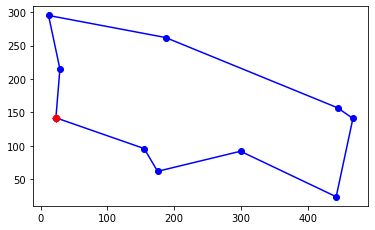

In [47]:
salesman(brute_force, generate_cities(10))

brute_force: 12 cities = tour length 1256 (in 1376.280 sec)


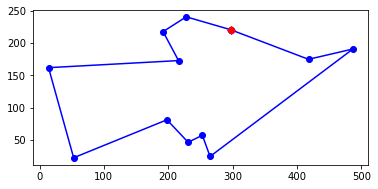

In [49]:
salesman(brute_force, generate_cities(12))

Now you can play with the number of cities. With the 100 cities the time drammatically increases (I could not wait to tell you the time) as the number of possible combinations. This is begginner exercise but it can show you the beaty of computing. If it is begginner exercice, it touches the problem whether there is difference between NP and P problem, which depicts boundaries of the human mind. Maybe this trivial problem could illustrate the need for quantum computing.